# **Project Name**    -    Uber Supply Demand Gap Insights



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project deals with the detection and analysing of supply demand gap in Uber Cab Services particularly at the Airport and at the city, and recommending possible solutions to overcome the Supply Demand Gap, ensuring the smooth running of business and great user experience.

# **GitHub Link -**

# **Problem Statement**


How can Uber optimize its business so that there is less supply demand gap?

#### **Define Your Business Objective?**

1. Detecting Supply Demand Gap in the Cab ride bussiness
2. Exploring possible solutions to reduce the Supply-Demand Gap in the business to satisfy customers and increase revenue generation.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***/

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
df = pd.read_csv("Uber Request Data - Cleaned.csv")

### Dataset First View

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Time Slot,Day of the Week,Request Status,Trip Duration (Mins.)
0,619,Airport,1,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,Morning,Mon,Request Fullfilled,69.0
1,867,Airport,1,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,Evening,Mon,Request Fullfilled,50.0
2,1807,City,1,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,Morning,Tue,Request Fullfilled,41.0
3,2532,Airport,1,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,Night,Tue,Request Fullfilled,55.0
4,3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,Morning,Wed,Request Fullfilled,52.5


### Dataset Rows & Columns count

In [4]:
df.shape

(6745, 10)

### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Request id             6745 non-null   int64  
 1   Pickup point           6745 non-null   object 
 2   Driver id              6745 non-null   object 
 3   Status                 6745 non-null   object 
 4   Request timestamp      6745 non-null   object 
 5   Drop timestamp         2831 non-null   object 
 6   Time Slot              6745 non-null   object 
 7   Day of the Week        6745 non-null   object 
 8   Request Status         6745 non-null   object 
 9   Trip Duration (Mins.)  6745 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 527.1+ KB


### Changing 'Request timestamp' and 'Drop timestamp' to datetime format.

In [6]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'],format="%d-%m-%Y %H:%M")
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'],format="%d-%m-%Y %H:%M")

### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [7]:
df.describe()

,Request id,Request timestamp,Drop timestamp,Trip Duration (Mins.)
count,6745.000000,6745,2831,6745.000000
mean,3384.644922,2016-07-13 13:42:46.514455296,2016-07-13 13:15:16.404097536,21.999081
min,1.000000,2016-07-11 00:00:00,2016-07-11 00:51:00,0.000000
25%,1691.000000,2016-07-12 07:51:00,2016-07-12 07:42:00,0.000000
50%,3387.000000,2016-07-13 14:23:00,2016-07-13 12:14:00,0.000000
75%,5080.000000,2016-07-14 19:39:00,2016-07-14 19:13:30,48.000000
max,6766.000000,2016-07-15 23:59:00,2016-07-16 01:09:00,83.000000
std,1955.099667,NaN,NaN,27.380612


### Variables Description

1.	Request id – Contains the generated id per request
2.	Pickup point – Journey start points (Airport or City)
3.	Driver id – Id of the driver assigned to request id (Unique id per driver)
4.	Status – Trip Status (Completed, no cars Available, Cancelled)
5.	Request timestamp – Time at which request was made by user
6.	Drop timestamp – Time at which user was dropped to their destination.

### Check Unique Values for each variable.

In [8]:
df.nunique()

Request id               6745
Pickup point                2
Driver id                 301
Status                      3
Request timestamp        4016
Drop timestamp           2282
Time Slot                   6
Day of the Week             5
Request Status              2
Trip Duration (Mins.)     528
dtype: int64

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

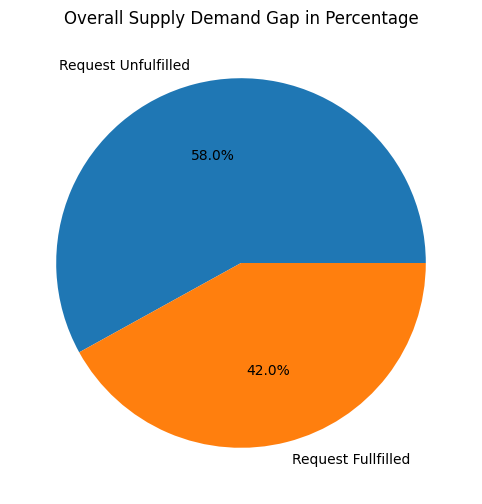

In [10]:
plt.figure(figsize = (10,6))
plt.title("Overall Supply Demand Gap in Percentage")
counts = df['Request Status'].value_counts()
plt.pie(counts,labels = counts.index,autopct="%1.1f%%")
plt.tight_layout
plt.savefig('Chart1.png')

##### 1. Why did you pick the specific chart?

This pie chart shows the overall Supply-Demand Gap Percentage in the available dataset.

##### 2. What is/are the insight(s) found from the chart?

1. Request unfulfilled (Ride Cancelled by driver/Unavailability of cars) for the user.
    - Ride Cancelled by the driver/ Unavailability of cars is about 58% of the total available data. This is more than 50% of the data. This could be due to unavailability of drivers/cars in the peak rush hour or cacelling the rides by drivers because of hesitation for long distance rides.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that can lead to negative growth
    - Significant number of unfulfilled request about 58% can lead to customer dissatisfaction and could probably result in customer churn from the plateform.
 
- Business Strategy
    - Deploying more cars if the number of cars is not enough in the peak rush hours
    - Providing incentives to cab drivers on peak rush hours or loyalty points.
    - Providing bonuses to cab drivers for long rides.

This strategies could lead to more request fulfillment and more customer satisfaction.

#### Chart - 2

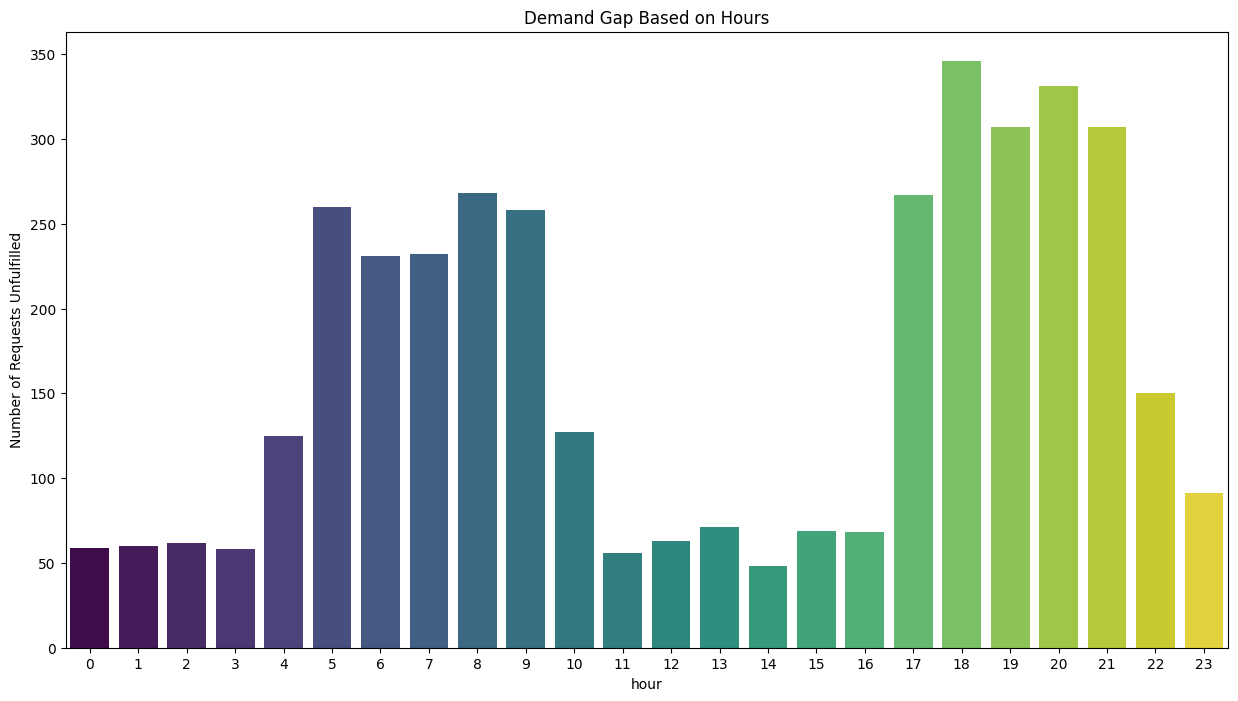

In [11]:
df_unfulfilled = df[df['Request Status'] != 'Request Fullfilled'].copy()
df_unfulfilled['hour'] = df_unfulfilled['Request timestamp'].dt.hour
df_temp = df_unfulfilled.groupby('hour')['Request id'].count().reset_index(name = "Counts")
plt.figure(figsize = (15,8))
plt.title("Demand Gap Based on Hours")
sns.barplot(data = df_temp,x = 'hour',y = 'Counts',hue = 'hour',legend = False,palette = 'viridis')
plt.ylabel("Number of Requests Unfulfilled")
plt.savefig('Chart2.png')

##### 1. Why did you pick the specific chart?

This Bar Chart shows the Hourly Average of Demand Gap.

##### 2. What is/are the insight(s) found from the chart?

This graph shows bimodal distributions
- First peak in Demand Gap is somewhere in Morning hours (4AM to 10AM)
- Second peak (more prominent) is somewhere in Evening Hours (5AM to 21AM)

This could be due to peak rush hours typically in morning hours and as well as in Evening hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that can lead to negative growth.
    - Unavailability of cars or frequent cancellation of cab ride by drivers could cause frustration in customer, which in turn can result in increased user churn and bad reputation of the Company/Organisation.
 
- Business Strategy
    - Deploying more cars in the fields in morning hours and evening hours.
    - Hiring more drivers.
    - Incentifying drivers for rush hour operation and long cab ride.
    - Giving bonuses to drivers who engages more number customers in rush hours.

#### Chart - 3

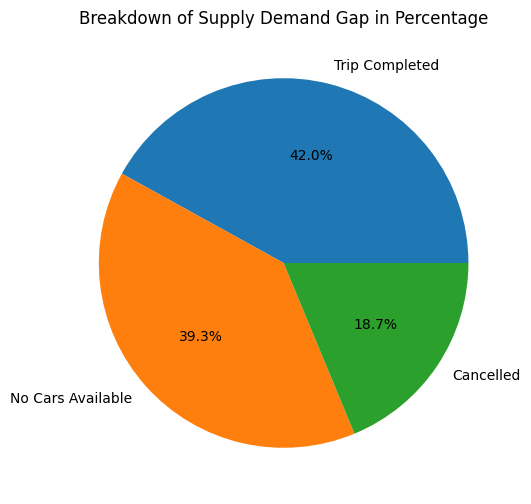

In [12]:
plt.figure(figsize = (10,6))
plt.title("Breakdown of Supply Demand Gap in Percentage")
counts = df['Status'].value_counts()
plt.pie(counts,labels = counts.index,autopct="%1.1f%%")
plt.tight_layout
plt.savefig('Chart3.png')

##### 1. Why did you pick the specific chart?

This Pie Chart shows the distribution of trip status in percentages.

##### 2. What is/are the insight(s) found from the chart?

1. High trip fulfillment but not majority
    - Only 42% of the trips were completed successfuly. While this is the large segemnt, its still less than half, suggesting room for improvement in service reliability.
2. High Incidence of Unavailability:
    - A significant 39.3% of trip requests failed due to no cars being available, indicating supply constraints. This could reflect
        - Insufficient driver supply during peak rush hour.
        - Poor distribution of cars relative to demand hotspots.
3. Considerable Cancellations:
    - 18.7% of the trips were cancelled, which is not negligible. This could be due to:
        - Long distance drive
        - Hesitation by drivers for long distance ride.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that can lead to negative business growth
    - 39.3% of cars unavailabilty and 18.7% of ride cancellations can heavily lead to user dissatisfaction and user churn, resulting in business loss.
 
- Business Strategies
    - Hiring more cars and drivers to fulfill the peak hours demand.
    - Distributuon of cars relative to demand hotspots.
    - Incentifying drivers for long distance drive.
    - Applying Bonsus scheme for drivers for engaging more customers in rush/peak hours. 

#### Chart - 4

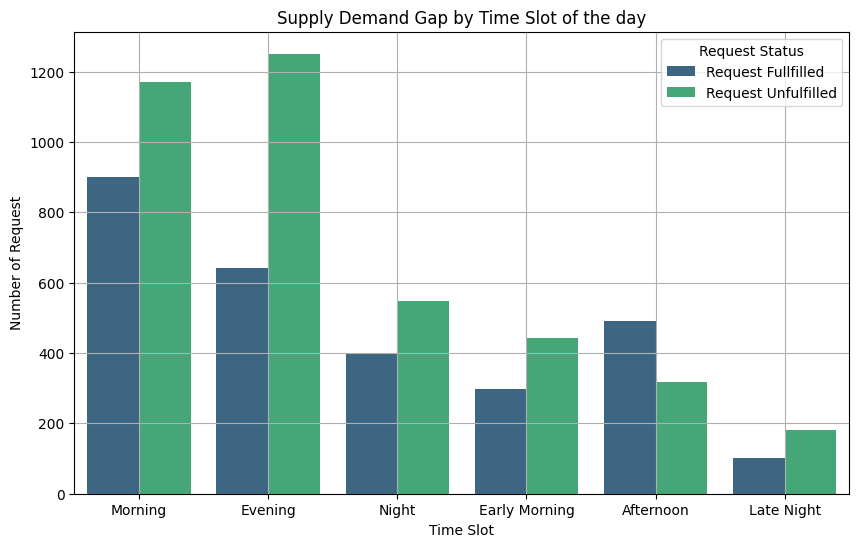

In [13]:
plt.figure(figsize = (10,6))
plt.title("Supply Demand Gap by Time Slot of the day")
sns.countplot(df,x = 'Time Slot',hue = 'Request Status',palette = 'viridis')
plt.ylabel("Number of Request")
plt.grid()
plt.savefig('Chart4.png')

##### 1. Why did you pick the specific chart?

This chart shows the Supply demand gap vs fulfilled demand by Time Slot of the day.

##### 2. What is/are the insight(s) found from the chart?

1. In most Time Slot of the day there are more Unfulfilled requests than fulfilled requests, except Afternoon.
2. There are higher number of requests in Morning and Evening, out of which most requests are going unfulfilled particularly in the Evening (highest ratio). These could be due to peak rush hour in the Evening and Morning.
3. There are also some significant Unfulfilled requests in the night,Early Morning and Late Night. These could be due to drivers unwilling to drive in Night time, Early Morning or at Late Night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that could lead to negative growth.
    - Persistent higher number of unfulfilled requests could potentially damage company reputation and can cause heavy user churn and negative feedback.
    - high unfulfilled requests in rush hour (Morning and Evening) may negatively imapct business growth when people are in hurry to get to their destianation.

- Business Strategy
    - Deploying more cars and hiring more driver in the field particularly in Evening and Morning (during peak rush hour) could help fulfilling the demands.
    - Deploying drivers and cars in the field at night shift could also help fulfilling the demands at night. Incentifying the driver during night time could motivate the driver to do their job efficiently.
    - For early morning and Late night driving, the drivers could be also motivated by Incentives and bonuses.

#### Chart - 5

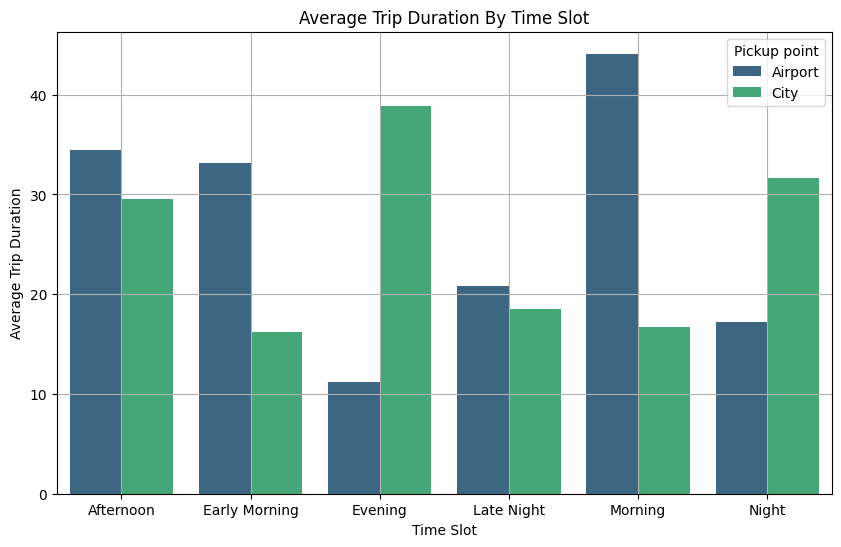

In [14]:
df_temp = df[df['Request Status'] == 'Request Fullfilled']
df_temp = df.groupby(['Pickup point','Time Slot'])['Trip Duration (Mins.)'].mean().reset_index(name = 'Average Trip Duration')
plt.figure(figsize = (10,6))
plt.title("Average Trip Duration By Time Slot")
sns.barplot(df_temp,x = 'Time Slot',y = 'Average Trip Duration',hue = 'Pickup point',palette = 'viridis')
plt.grid()
plt.savefig('Chart5.png')

##### 1. Why did you pick the specific chart?

This bar chart shows the average trip duration by time slot, separated by pickup point (Airport vs City).

##### 2. What is/are the insight(s) found from the chart?

1. Airport pickups Take longer (Generally)
    - For most time slots, trips starting from the Airport have longer durations tahn those from the city.
2. Evening Pattern is reversed:
    - In the evening, City pickups have much higher average duartions (39 mins) compared to Airport(11 mins). This may include
        - Heavy evening traffic in city areas.
        - Shorter sirport trips possibly due to fewer bookings or off-peak demand.
3. Night time Disparity:
    - At night, City trips are again longer tahn Airport trips, possibly due to longer routes or fewer raffic interuptions enabling longer distance rides.
4. Late night is more balanced:
    - Both pickup points show similar duartions(18-21 mins), suggesting smoother traffic during this time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that could lead to negative growth.
    - Not implementing dynamic pricing based on trip duration or surge adjustments and Time Slot based dynamic pricing could lead to less revenue generation which can cause negative impact on business.
 
- Business Strategies
1. Dynamic pricing / Surge Adjustments:
    - Apply time slot based dynamic pricing
        - Evening: Higher rates in City due to longer trip durations.
        - Morning: Higher rates from Airport due to longer trips and likely higher demand.
2. Driver Allocation Optimization:
    - Increase driver availability at the Airport during morning and Early Morning to cover long trips.
    - Deploy more drivers in City areas during Evenings where trip duration and likely traffic are high.
3. Customer Communication:
    - Notify users about expected longer trip times during specific time slots and pickup zones.(e.g. "Expect longer wait and trip durations in the City during Evening Hours")

#### Chart - 6

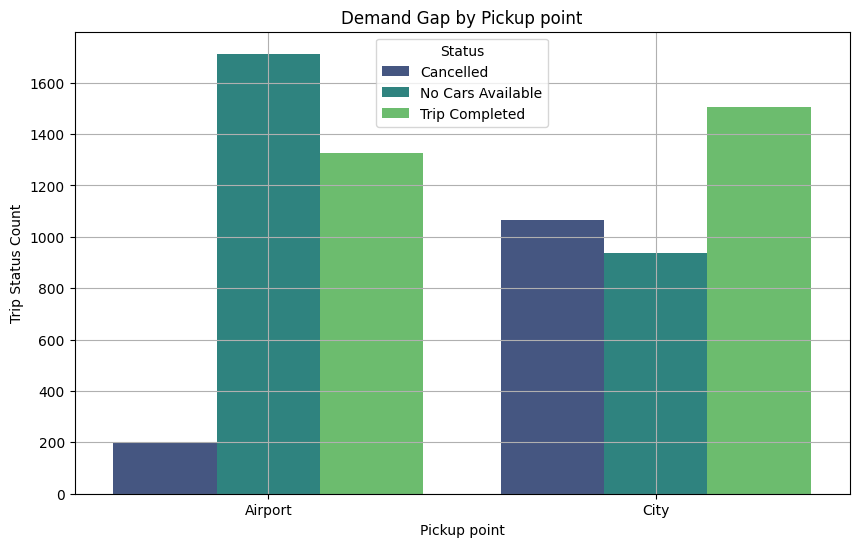

In [15]:
df_temp = df.groupby(['Pickup point','Status'])['Request id'].count().reset_index(name = "Count")
plt.figure(figsize = (10,6))
plt.title("Demand Gap by Pickup point")
sns.barplot(df_temp,x = 'Pickup point', y = 'Count',hue = 'Status',palette = 'viridis')
plt.ylabel("Trip Status Count")
plt.grid()
plt.savefig('Chart6.png')

##### 1. Why did you pick the specific chart?

This chart shows the trip request outcomes by pickup point across three statuses:
- Cancelled
- No Cars Available
- Trip Completed

##### 2. What is/are the insight(s) found from the chart?

1. Airport pickup point:
    - High "No Cars Available" count(about 1700):
      This is the highest among all categories- indicating a serious supply shortage at the airport.
    - Lower trip completions(1300) compared to unfulfilled demand.
    - Very low cancellations
      This suugest that users are not cancelling on their own; rather trips are failing due to supply issues.
2. City pickup point:
    - Highest trip completions (1500):
      Indicates better service in the city.
    - Moderate "No Cars Available":
      Demand supply mismatch exists but is less severe than at airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that can lead to negative growth
    - Serious Supply Shortage at Airport could cause bad user experiance.

A. For Airport Pickup Point.
1. Severe Under-Supply:
    - Deploy a dedicated fleet or reserve a driver pool for airport pickups.
    - Use flight schedule integration to predict peak load and pre-position cars.
2. Driver Incentives:
    - Provide bonuses for airport pickups, especially during peak demand hours (as shown in your earlier graphs — e.g., Evening).
    - Create short-haul ride bonuses to encourage drivers even for low fare trips from the airport.
3. Passenger Communication:
    - Implement scheduled ride options at airports with guaranteed pickup.
    - Notify users of wait times and options when "No Cars Available" rates are rising.

B. For City Pickup Point
1. Driver Reliability Monitoring:
    - Use analytics to detect driver behavior causing high cancellation rates (e.g., drivers declining trips).
    - Provide driver accountability dashboards and incentives for high trip completion rates.
2. Dynamic Pricing Control:
    - If cancellations spike during high fares, implement price caps during certain periods to maintain demand.

#### Chart - 7

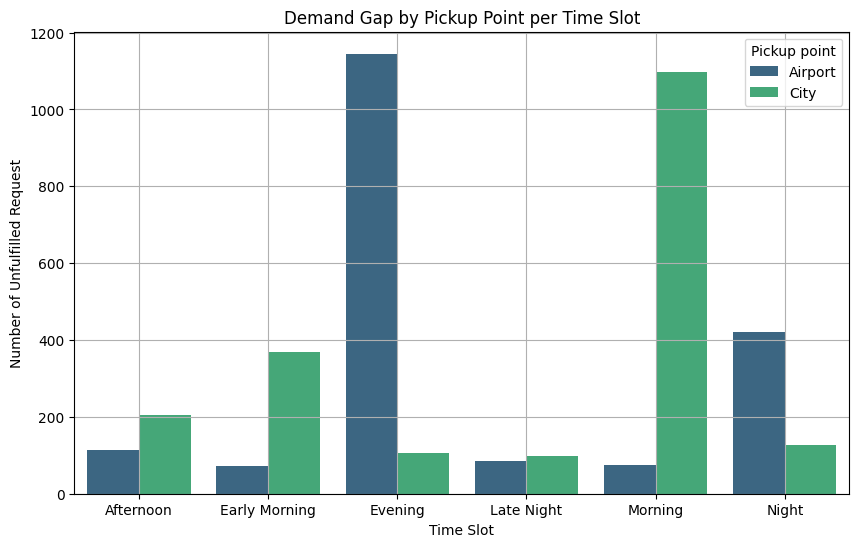

In [16]:
df_temp = df_unfulfilled.groupby(['Pickup point','Time Slot'])['Request id'].count().reset_index(name = "Count")
plt.figure(figsize = (10,6))
plt.title("Demand Gap by Pickup Point per Time Slot")
sns.barplot(df_temp,x = 'Time Slot', y = 'Count', hue = 'Pickup point',palette='viridis')
plt.ylabel("Number of Unfulfilled Request")
plt.grid()
plt.savefig('Chart7.png')

##### 1. Why did you pick the specific chart?

This clustered bar chart shows the Demand Gaps by Pickup point (Airport or City) per Time Slot.

##### 2. What is/are the insight(s) found from the chart?

1. major Demand Gaps at Specific Times and Locations:
    - Evening (Airport): about 1150 unfulfilled requests. (highest gap overall).
    - Morning (City): about 1100 unfulfilled requests. (Second highest)
    - These two areas are clear supply-demand mismatch hotspots.
2. Early morning (City):
    - Significant unfulfilled demand (about 370 requests), which might suggest insufficient early-shift drivers in the city.
3. Night (Airport):
    - Notable demand gap (about 420 requests), possibly due to reduced night shift drivers or irregular late night flight arrivals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Insights that can lead to negative growth
    - Major demand gaps at Airport in the Evening hours and t the City in the morning hours indicates rush hours at Airport in the Evening and at the City in the Morning. Not addressing this issue could potentially cause customer dissatisfaction and high customer churn rate.
 
- Business Insights
1. Supply Optimization
    - Airport - Evening:
        - Deploy more drivers at the airport during evening peak.
        - Offer incentives for drivers willing to take evening airport pickups.
        - Use flight- arrival data to allign supply with demand spikes.
    - City - Morning:
        - increase city driver availability in mornig hours.
        - Consider pre-scheduling or pre-booking options to smooth morning rush demand.
    - City - Early Morning:
        - Adjust shift schedules so more drivers start earlier
        - Incentivize early shift drives with bonuses or higher rates.
2. Driver Incentives and Training Programs
    - design targeted incentive programs to encourage drivers to work during:
        - Evening (Airport)
        - Morning (City)
3. Customer Experiance Improvement
    - For time slots with chronic shortages:
        - Show users realistic wait times or suggest alternate time Slots.
        - Offer scheduled rides with guaranteed pickups if booked in advance.

#### Chart - 8

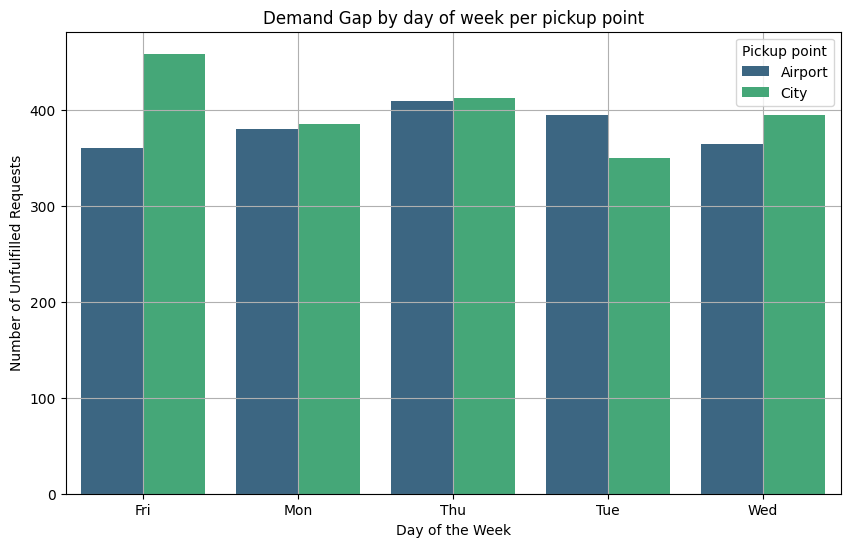

In [17]:
df_temp = df_unfulfilled.groupby(['Pickup point','Day of the Week'])['Request id'].count().reset_index(name = "Count")
plt.figure(figsize = (10,6))
plt.title("Demand Gap by day of week per pickup point")
sns.barplot(df_temp,y = 'Count',x = 'Day of the Week',hue = 'Pickup point',palette = 'viridis')
plt.ylabel("Number of Unfulfilled Requests")
plt.grid()
plt.savefig('Chart8.png')

##### 1. Why did you pick the specific chart?

This bar chart shows the number of unfulfilled requests by day of the week, segmented by pickup point (Airport vs City). It gives visibility into weekly demand gaps at both pickup locations.

##### 2. What is/are the insight(s) found from the chart?

1. Friday Has the Highest Demand Gap for City:
City requests spike significantly (~460 unfulfilled requests).Indicates higher demand before the weekend—likely due to commuters, events, or leisure travel.

2. Airport Unfulfilled Demand Peaks on Thursday & Tuesday:
Both days show over 400 unfulfilled requests.Possibly due to business travel cycles, which tend to peak mid-week.

3. Monday and Wednesday Are Relatively Balanced:
Demand gaps at both pickup points are nearly equal and moderate.Likely reflects stable weekday routines with better alignment of supply and demand.

4. City Demand Gap More Volatile Across Days:
City demand gaps vary more than Airport, with sharp highs on Friday and dips on Tuesday.Indicates more unpredictable and event-driven urban usage patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Increase City driver availability on Fridays:
    - Launch “Friday Boost” incentives for drivers in city zones.
    - Allow driver shift extensions on Friday evenings to reduce unfulfilled requests.
    - Deploy more Airport drivers on Tuesday and Thursday:
    - Match airport supply with flight arrivals mid-week.
    - Introduce airport zone bonuses for these days.
- Customer Behavior Handling
    - On high-gap days (e.g., Friday in the city):
    - Send advance booking reminders to users.
    - Offer discounts or loyalty points for scheduling during non-peak times (e.g., Monday/Wednesday).

# **Conclusion**

**Overall Insights:**
1.	City Pickup Demand:
    - Friday shows the highest number of unfulfilled ride requests (~460).
    - This suggests increased urban travel demand before the weekend due to work commutes, social outings, or events.
    - The demand gap is highly volatile throughout the week—likely tied to unpredictable urban patterns.
    - At Morning hours there are significantly more unfulfilled ride request.
2.	Airport Pickup Demand:
    - Tuesday and Thursday show high unmet demand (>400 requests), possibly due to mid-week business travel peaks.
    - The airport demand pattern is more stable compared to the city, aligning with scheduled flight patterns.
    - At Evenings there are significantly more unfulfilled ride request.

**Overall Business Strategy:**
1. Dynamic Driver Incentives
- City (Friday Focused)
    - Implement “Friday Boost Incentives” to encourage more drivers to operate in City Zones specially in Morning Hours.
    - Allow extended driving hours or relaxed shift rules on Friday
- Airport (Tue/Thu Focused)
    - Align driver / car availability with flight arrival schedule.
    - Offer zone-based bonuses for airport pickups on specific days.
2. Demand Smoothing via User – side Actions
- User Behaviour Management:
    - Advance Booking Reminder for peak demand periods (e.g. Friday Mornings in City and Thursday Evenings in Airport)
    - Offer discounts or loyalty perks for scheduling during non-peak days and non-peak hours.
3. Operational Optimization
    - Dynamic reallocation of idle drivers between airport and City zones depending on real-time data.

**Conclusion:**
	The project clearly identifies key temporal and spatial mismatches in Uber’s supply-demand ecosystem. By applying targeted operational strategies such as incentive realignment and behavioural nudges, Uber can significantly reduce the demand gap, enhance customer experience, and increase driver utilization and revenue.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***